## installing depedencies

In [ ]:
!pip3 install seaborn

In [1]:
import pandas as pd

students = pd.read_json('data/students.json')
courses  = pd.read_json('data/courses.json')

## registring the students in the course

In [2]:
import numpy as np

# Creating "enrollment variable" -> this is the courses amount for each student 
students['enrollment'] = np.ceil(np.random.exponential(size = len(students)) * 1.5).astype(int)
students['enrollment'].describe()

count    40.000000
mean      1.800000
std       1.181047
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       5.000000
Name: enrollment, dtype: float64

In [3]:
students.head()

,nome,studentsID,domain,email,enrollment
0,MARIA,30,@serviceemail.com,maria@serviceemail.com,1
1,ANA,33,@serviceemail.com,ana@serviceemail.com,2
2,FRANCISCA,23,@domainemail.com.br,francisca@domainemail.com.br,1
3,ANTONIA,27,@serviceemail.com,antonia@serviceemail.com,1
4,ADRIANA,20,@serviceemail.com,adriana@serviceemail.com,1


## Using seaborn

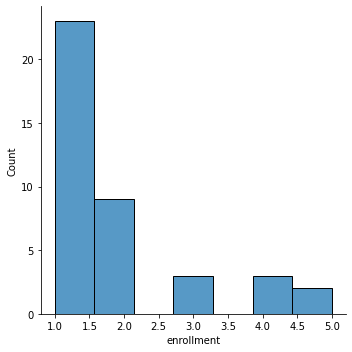

In [5]:
import seaborn as sns

sns.displot(students['enrollment'])

In [6]:
students['enrollment'].value_counts()

1    23
2     9
4     3
3     3
5     2
Name: enrollment, dtype: int64

## Selecting courses

In [8]:
students.sample(5)

,nome,studentsID,domain,email,enrollment
3,ANTONIA,27,@serviceemail.com,antonia@serviceemail.com,1
31,GABRIEL,32,@domainemail.com.br,gabriel@domainemail.com.br,5
20,JOSE,2,@serviceemail.com,jose@serviceemail.com,1
34,MARCELO,25,@domainemail.com.br,marcelo@domainemail.com.br,1
19,MARIANA,3,@serviceemail.com,mariana@serviceemail.com,1


In [9]:
all_enrollments = [] # variable for all courses
x = np.random.rand(20) # array with 20 numbers randons
prob = x / sum(x) # variable with the probability

In [12]:
"""
    This "for" works for fill the "all_enrollments" variable with the relation between students and yours courses  
    - iterrows() -> Mode for iterate in each row
""" 


for index, row in students.iterrows():
    id = row.studentsID
    enrollments = row.enrollment
    for i in range(enrollments):
        enrollment = [id, np.random.choice(courses.index, p = prob)]
        all_enrollments.append(enrollment)
        
# creating dataframe with "all_enrollments" variable filled
enrollments = pd.DataFrame(all_enrollments, columns = ['studentsID', 'coursesID'])

In [24]:
enrollments.head()

,studentsID,coursesID
0,30,8
1,33,12
2,33,12
3,23,11
4,27,12


In [26]:
# Creating a new DataFrame with the students mount for each course
# Here was used .groupby and .count for realize the operation
# and was used .join for create a variable with course description

enrollments_per_course = enrollments.groupby('coursesID').count().join(courses['courses_name']).rename(
    columns={
        'studentsID': 'number of students'
    }
)

enrollments_per_course.head()

,number of students,courses_name
coursesID,,
1,5,Lógica de programação
2,4,Java para Web
3,5,C# para Web
4,6,Ruby on Rails
5,5,Cursos de Python


## Exporting 

In [27]:
enrollments_per_course.to_json('data/enrollments_per_course.json')